1st column is the acceleration data in the X axis measured by the sensor ADXL345.
2nd column is the acceleration data in the Y axis measured by the sensor ADXL345.
3rd column is the acceleration data in the Z axis measured by the sensor ADXL345.

4th column is the rotation data in the X axis measured by the sensor ITG3200.
5th column is the rotation data in the Y axis measured by the sensor ITG3200.
6th column is the rotation data in the Z axis measured by the sensor ITG3200.

7th column is the acceleration data in the X axis measured by the sensor MMA8451Q.
8th column is the acceleration data in the Y axis measured by the sensor MMA8451Q.
9th column is the acceleration data in the Z axis measured by the sensor MMA8451Q.

File name format:
**<ADL OR FALL_CODE>_<SUBJECT_ID>_<TRIAL_NO>.txt**

**Activities of Daily Living (ADL):**

<!-- <div align="center"> -->

| Code | Activity                                                                                 | Trials | Duration |
|:----:|------------------------------------------------------------------------------------------|:------:|:--------:|
| D01  | Walking slowly                                                                           | 1      | 100s     |
| D02  | Walking quickly                                                                          | 1      | 100s     |
| D03  | Jogging slowly                                                                           | 1      | 100s     |
| D04  | Jogging quickly                                                                          | 1      | 100s     |
| D05  | Walking upstairs and downstairs slowly                                                   | 5      | 25s      |
| D06  | Walking upstairs and downstairs quickly                                                  | 5      | 25s      |
| D07  | Slowly sit in a half height chair, wait a moment, and up slowly                          | 5      | 12s      |
| D08  | Quickly sit in a half height chair, wait a moment, and up quickly                        | 5      | 12s      |
| D09  | Slowly sit in a low height chair, wait a moment, and up slowly                           | 5      | 12s      |
| D10  | Quickly sit in a low height chair, wait a moment, and up quickly                         | 5      | 12s      |
| D11  | Sitting a moment, trying to get up, and collapse into a chair                            | 5      | 12s      |
| D12  | Sitting a moment, lying slowly, wait a moment, and sit again                             | 5      | 12s      |
| D13  | Sitting a moment, lying quickly, wait a moment, and sit again                            | 5      | 12s      |
| D14  | Being on one's back change to lateral position, wait a moment, and change to one's back  | 5      | 12s      |
| D15  | Standing, slowly bending at knees, and getting up                                        | 5      | 12s      |
| D16  | Standing, slowly bending without bending knees, and getting up                           | 5      | 12s      |
| D17  | Standing, get into a car, remain seated and get out of the car                           | 5      | 25s      |
| D18  | Stumble while walking                                                                    | 5      | 12s      |
| D19  | Gently jump without falling (trying to reach a high object)                              | 5      | 12s      |


Falls:

| Code | Activity                                                                                 | Trials | Duration |
|:----:|------------------------------------------------------------------------------------------|:------:|:--------:|
| F01  | Fall forward while walking caused by a slip                                              | 5      | 15s      |
| F02  | Fall backward while walking caused by a slip                                             | 5      | 15s      |
| F03  | Lateral fall while walking caused by a slip                                              | 5      | 15s      |
| F04  | Fall forward while walking caused by a trip                                              | 5      | 15s      |
| F05  | Fall forward while jogging caused by a trip                                              | 5      | 15s      |
| F06  | Vertical fall while walking caused by fainting                                           | 5      | 15s      |
| F07  | Fall while walking, with use of hands in a table to dampen fall, caused by fainting      | 5      | 15s      |
| F08  | Fall forward when trying to get up                                                       | 5      | 15s      |
| F09  | Lateral fall when trying to get up                                                       | 5      | 15s      |
| F10  | Fall forward when trying to sit down                                                     | 5      | 15s      |
| F11  | Fall backward when trying to sit down                                                    | 5      | 15s      |
| F12  | Lateral fall when trying to sit down                                                     | 5      | 15s      |
| F13  | Fall forward while sitting, caused by fainting or falling asleep                         | 5      | 15s      |
| F14  | Fall backward while sitting, caused by fainting or falling asleep                        | 5      | 15s      |
| F15  | Lateral fall while sitting, caused by fainting or falling asleep                         | 5      | 15s      |
<!-- </div> -->

File name format:

**<ADL OR FALL_CODE>_<SUBJECT_ID>_<TRIAL_NO>.txt**

- 23 adult subject    ---> SA01 ~ SA23
- 15 elderly subject  ---> SE01~ SE15

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import zipfile
import functions as fn

# Reading zip file or unzipped folder:

In [2]:
# Path to zip file
zip_file_path = '/Volumes/Windows SD/Master SSE/Semester 2/Fall Detection/DataSet.zip'

# Base path to the dataset folder structure *inside* the zip file
base_path = 'DataSet/SisFall_dataset'

# Create list of folder names (SA01 to SA23 and SE01 to SE15)
subject_ids = [f'SA{str(i).zfill(2)}' for i in range(1, 24)] + [f'SE{str(i).zfill(2)}' for i in range(1, 16)]


# all_data, all_labels, activity_code_list, adls, falls = fn.read_file(base_path, subject_ids)
all_data, all_labels, activity_code_list, file_name_list, adls, falls = fn.read_zip(zip_file_path, base_path, subject_ids)

Progress: 4505/4505 files processed
Total files processed: 4505 ✅
Total ADL labels: 2707 ✅
Total Fall labels: 1798 ✅


## Validating length/count of data to check if it is correct

in order to check the total amount of read data, we check both length of data and labels.

In [3]:
print(f'number of total readings: {len(all_data)}')
print(f'number of total labels: {len(all_labels)}')
print(f'number of total activity codes: {len(activity_code_list)}')
print(f'number of total file names: {len(file_name_list)}')
print('------------------------------------------')
print(f'number of total ADL data: {len(adls)}')
print(f'number of total Fall data: {len(falls)}')
print('------------------------------------------')
# print number of unique labels and their counts
unique_labels, counts = np.unique(all_labels, return_counts=True)
print("Unique labels and their counts:")
for label, count in zip(unique_labels, counts):
    print(f"{label}: {count}")

number of total readings: 4505
number of total labels: 4505
number of total activity codes: 4505
number of total file names: 4505
------------------------------------------
number of total ADL data: 2707
number of total Fall data: 1798
------------------------------------------
Unique labels and their counts:
ADL: 2707
Fall: 1798


In [4]:
# print all unique activity codes
unique_activity_codes = np.unique(activity_code_list)
print("Unique activity codes:")
for code in unique_activity_codes:
    print(code)

Unique activity codes:
D01
D02
D03
D04
D05
D06
D07
D08
D09
D10
D11
D12
D13
D14
D15
D16
D17
D18
D19
F01
F02
F03
F04
F05
F06
F07
F08
F09
F10
F11
F12
F13
F14
F15


In [5]:
# create a dictionary to map activity codes to real-world activities
activity_mapping = {
    "D01": "Walking slowly",
    "D02": "Walking quickly",
    "D03": "Jogging slowly",
    "D04": "Jogging quickly",
    "D05": "Walking upstairs and downstairs slowly",
    "D06": "Walking upstairs and downstairs quickly",
    "D07": "Slowly sit in a half height chair, wait a moment, and up slowly",
    "D08": "Quickly sit in a half height chair, wait a moment, and up quickly",
    "D09": "Slowly sit in a low height chair, wait a moment, and up slowly",
    "D10": "Quickly sit in a low height chair, wait a moment, and up quickly",
    "D11": "Sitting a moment, trying to get up, and collapse into a chair ",
    "D12": "Sitting a moment, lying slowly, wait a moment, and sit again",
    "D13": "Sitting a moment, lying quickly, wait a moment, and sit again",
    "D14": "Being on one's back change to lateral position, wait a moment, and change to one's back",
    "D15": "Standing, slowly bending at knees, and getting up",
    "D16": "Standing, slowly bending without bending knees, and getting up",
    "D17": "Standing, get into a car, remain seated and get out of the car",
    "D18": "Stumble while walking",
    "D19": "Gently jump without falling (trying to reach a high object)",
    "F01": "Fall forward while walking caused by a slip",
    "F02": "Fall backward while walking caused by a slip",
    "F03": "Lateral fall while walking caused by a slip",
    "F04": "Fall forward while walking caused by a trip",
    "F05": "Fall backward while walking caused by a trip",
    "F06": "Vertical fall while walking caused by fainting",
    "F07": "Fall while walking, with use of hands in a table to dampen fall, caused by fainting",
    "F08": "Fall forward when trying to get up",
    "F09": "Lateral fall when trying to get up",
    "F10": "Fall forward when trying to sit down",
    "F11": "Fall backward when trying to sit down",
    "F12": "Lateral fall when trying to sit down",
    "F13": "Fall forward while sitting, caused by fainting or falling asleep",
    "F14": "Fall backward while sitting, caused by fainting or falling asleep",
    "F15": "Lateral fall while sitting, caused by fainting or falling asleep",
}


## plot random file

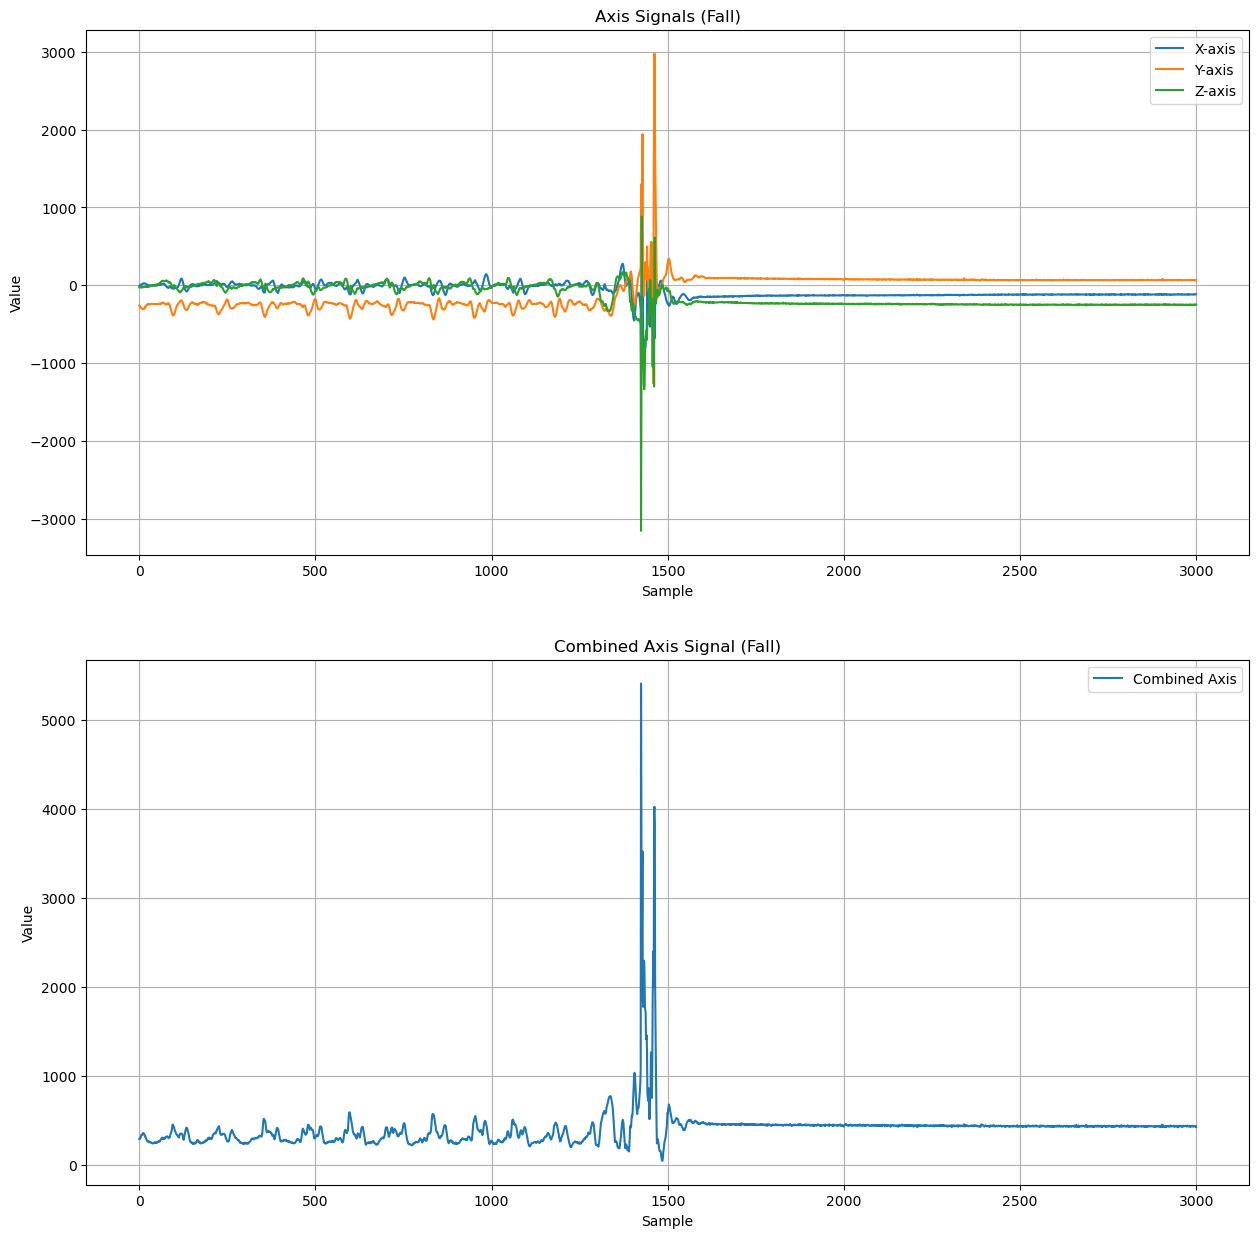

In [7]:
all_axis = np.abs(falls[0][0, :]) + np.abs(falls[0][1, :]) + np.abs(falls[0][2, :])
plt.figure(figsize=(15, 15))

plt.subplot(2, 1, 2)
plt.plot(all_axis, label='Combined Axis')
plt.title(f'Combined Axis Signal (Fall)')
plt.xlabel('Sample')
plt.ylabel('Value')
plt.grid()
plt.legend()

plt.subplot(2, 1, 1)
plt.plot(falls[0][0, :], label='X-axis')
plt.plot(falls[0][1, :], label='Y-axis')
plt.plot(falls[0][2, :], label='Z-axis')
plt.title('Axis Signals (Fall)')
plt.xlabel('Sample')
plt.ylabel('Value')
plt.grid()
plt.legend()

plt.show()

In [8]:
d01_list_index = []
for i in range(len(all_data)):
    if activity_code_list[i] == 'D01':
        d01_list_index.append(i)
print(f'number of D01 readings: {len(d01_list_index)}')



number of D01 readings: 38


In [9]:
print(activity_code_list[0])
print(file_name_list[0])

D01
D01_SA01_R01.txt


In [6]:
# Find all indices of 'D01' in activity_code_list
d01_index = [i for i, code in enumerate(activity_code_list) if code == 'D01']
d02_index = [i for i, code in enumerate(activity_code_list) if code == 'D02']
d03_index = [i for i, code in enumerate(activity_code_list) if code == 'D03']
d04_index = [i for i, code in enumerate(activity_code_list) if code == 'D04']
d05_index = [i for i, code in enumerate(activity_code_list) if code == 'D05']
d06_index = [i for i, code in enumerate(activity_code_list) if code == 'D06']
d07_index = [i for i, code in enumerate(activity_code_list) if code == 'D07']
d08_index = [i for i, code in enumerate(activity_code_list) if code == 'D08']
d09_index = [i for i, code in enumerate(activity_code_list) if code == 'D09']
d10_index = [i for i, code in enumerate(activity_code_list) if code == 'D10']
d11_index = [i for i, code in enumerate(activity_code_list) if code == 'D11']
d12_index = [i for i, code in enumerate(activity_code_list) if code == 'D12']
d13_index = [i for i, code in enumerate(activity_code_list) if code == 'D13']
d14_index = [i for i, code in enumerate(activity_code_list) if code == 'D14']
d15_index = [i for i, code in enumerate(activity_code_list) if code == 'D15']
d16_index = [i for i, code in enumerate(activity_code_list) if code == 'D16']
d17_index = [i for i, code in enumerate(activity_code_list) if code == 'D17']
d18_index = [i for i, code in enumerate(activity_code_list) if code == 'D18']
d19_index = [i for i, code in enumerate(activity_code_list) if code == 'D19']
f01_index = [i for i, code in enumerate(activity_code_list) if code == 'F01']
f02_index = [i for i, code in enumerate(activity_code_list) if code == 'F02']
f03_index = [i for i, code in enumerate(activity_code_list) if code == 'F03']
f04_index = [i for i, code in enumerate(activity_code_list) if code == 'F04']
f05_index = [i for i, code in enumerate(activity_code_list) if code == 'F05']
f06_index = [i for i, code in enumerate(activity_code_list) if code == 'F06']
f07_index = [i for i, code in enumerate(activity_code_list) if code == 'F07']
f08_index = [i for i, code in enumerate(activity_code_list) if code == 'F08']
f09_index = [i for i, code in enumerate(activity_code_list) if code == 'F09']
f10_index = [i for i, code in enumerate(activity_code_list) if code == 'F10']
f11_index = [i for i, code in enumerate(activity_code_list) if code == 'F11']
f12_index = [i for i, code in enumerate(activity_code_list) if code == 'F12']
f13_index = [i for i, code in enumerate(activity_code_list) if code == 'F13']
f14_index = [i for i, code in enumerate(activity_code_list) if code == 'F14']
f15_index = [i for i, code in enumerate(activity_code_list) if code == 'F15']

In [7]:
print(f'number of D01: {len(d01_index)}')
print(f'number of D02: {len(d02_index)}')
print(f'number of D03: {len(d03_index)}')
print(f'number of D04: {len(d04_index)}')
print(f'number of D05: {len(d05_index)}')
print(f'number of D06: {len(d06_index)}')
print(f'number of D07: {len(d07_index)}')
print(f'number of D08: {len(d08_index)}')
print(f'number of D09: {len(d09_index)}')
print(f'number of D10: {len(d10_index)}')
print(f'number of D11: {len(d11_index)}')
print(f'number of D12: {len(d12_index)}')
print(f'number of D13: {len(d13_index)}')
print(f'number of D14: {len(d14_index)}')
print(f'number of D15: {len(d15_index)}')
print(f'number of D16: {len(d16_index)}')
print(f'number of D17: {len(d17_index)}')
print(f'number of D18: {len(d18_index)}')
print(f'number of D19: {len(d19_index)}')
print(f'number of F01: {len(f01_index)}')
print(f'number of F02: {len(f02_index)}')
print(f'number of F03: {len(f03_index)}')
print(f'number of F04: {len(f04_index)}')
print(f'number of F05: {len(f05_index)}')
print(f'number of F06: {len(f06_index)}')
print(f'number of F07: {len(f07_index)}')
print(f'number of F08: {len(f08_index)}')
print(f'number of F09: {len(f09_index)}')
print(f'number of F10: {len(f10_index)}')
print(f'number of F11: {len(f11_index)}')
print(f'number of F12: {len(f12_index)}')
print(f'number of F13: {len(f13_index)}')
print(f'number of F14: {len(f14_index)}')
print(f'number of F15: {len(f15_index)}')

number of D01: 38
number of D02: 38
number of D03: 38
number of D04: 36
number of D05: 190
number of D06: 118
number of D07: 190
number of D08: 190
number of D09: 185
number of D10: 185
number of D11: 190
number of D12: 190
number of D13: 120
number of D14: 190
number of D15: 190
number of D16: 190
number of D17: 189
number of D18: 120
number of D19: 120
number of F01: 119
number of F02: 120
number of F03: 120
number of F04: 120
number of F05: 120
number of F06: 120
number of F07: 120
number of F08: 120
number of F09: 120
number of F10: 119
number of F11: 120
number of F12: 120
number of F13: 120
number of F14: 120
number of F15: 120


In [8]:
# check if all length of each activities are same
for i in range(len(d05_index)):
    if len(all_data[d05_index[i]][0, :]) != len(all_data[d05_index[0]][0, :]):
        print(f"Length mismatch at index {i}: {len(all_data[d05_index[i]][0, :])} vs {len(all_data[d05_index[0]][0, :])}")
        

Length mismatch at index 25: 4999 vs 5000
Length mismatch at index 32: 4999 vs 5000
Length mismatch at index 34: 4999 vs 5000
Length mismatch at index 45: 4999 vs 5000
Length mismatch at index 50: 4999 vs 5000
Length mismatch at index 53: 4999 vs 5000
Length mismatch at index 69: 4999 vs 5000
Length mismatch at index 83: 4981 vs 5000
Length mismatch at index 101: 4999 vs 5000
Length mismatch at index 102: 4999 vs 5000
Length mismatch at index 121: 4999 vs 5000
Length mismatch at index 125: 4999 vs 5000
Length mismatch at index 127: 4999 vs 5000
Length mismatch at index 128: 5001 vs 5000
Length mismatch at index 130: 5001 vs 5000
Length mismatch at index 133: 4999 vs 5000
Length mismatch at index 134: 4999 vs 5000
Length mismatch at index 135: 5001 vs 5000
Length mismatch at index 145: 4999 vs 5000
Length mismatch at index 146: 4999 vs 5000
Length mismatch at index 147: 4999 vs 5000
Length mismatch at index 148: 4999 vs 5000
Length mismatch at index 149: 4999 vs 5000
Length mismatch at 

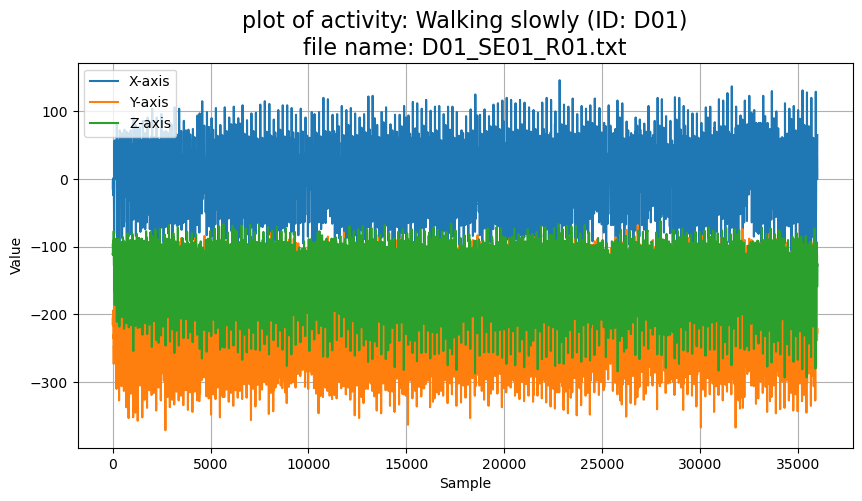

In [9]:
# for i in range(len(d01_index)):
i = 23
plt.figure(figsize=(10, 5))
plt.plot(all_data[d01_index[i]][0, :], label='X-axis')
plt.plot(all_data[d01_index[i]][1, :], label='Y-axis')
plt.plot(all_data[d01_index[i]][2, :], label='Z-axis')
plt.title(
    f"plot of activity: {activity_mapping[activity_code_list[d01_index[i]]]} "
    f"(ID: {activity_code_list[d01_index[i]]})"
    f"\nfile name: {file_name_list[d01_index[i]]}", fontsize=16)
plt.xlabel('Sample')
plt.ylabel('Value')
plt.grid()
plt.legend()
plt.show()


In [ ]:
i = 27

plt.figure(figsize=(15, 20))
plt.subplot(4, 1, 1)
plt.plot(all_data[d01_index[i]][0, :], label='X-axis')
plt.plot(all_data[d01_index[i]][1, :], label='Y-axis')
plt.plot(all_data[d01_index[i]][2, :], label='Z-axis')
plt.title(
    f"plot of activity: {activity_mapping[activity_code_list[d01_index[i]]]} "
    f"(ID: {activity_code_list[d01_index[i]]})", fontsize=16)
plt.xlabel('Sample')
plt.ylabel('Value')
plt.grid()
plt.legend()

plt.subplot(4, 1, 2)
plt.plot(all_data[d02_index[i]][0, :], label='X-axis')
plt.plot(all_data[d02_index[i]][1, :], label='Y-axis')
plt.plot(all_data[d02_index[i]][2, :], label='Z-axis')
plt.title(
    f"plot of activity: {activity_mapping[activity_code_list[d02_index[i]]]} "
    f"(ID: {activity_code_list[d02_index[i]]})", fontsize=16)
plt.xlabel('Sample')
plt.ylabel('Value')
plt.grid()
plt.legend()
plt.subplot(4, 1, 3)
plt.plot(all_data[d03_index[i]][0, :], label='X-axis')
plt.plot(all_data[d03_index[i]][1, :], label='Y-axis')
plt.plot(all_data[d03_index[i]][2, :], label='Z-axis')
plt.title(
    f"plot of activity: {activity_mapping[activity_code_list[d03_index[i]]]} "
    f"(ID: {activity_code_list[d03_index[i]]})", fontsize=16)
plt.xlabel('Sample')
plt.ylabel('Value')
plt.grid()
plt.legend()
plt.subplot(4, 1, 4)
plt.plot(all_data[d04_index[i]][0, :], label='X-axis')
plt.plot(all_data[d04_index[i]][1, :], label='Y-axis')
plt.plot(all_data[d04_index[i]][2, :], label='Z-axis')
plt.title(
    f"plot of activity: {activity_mapping[activity_code_list[d04_index[i]]]} "
    f"(ID: {activity_code_list[d04_index[i]]})", fontsize=16)
plt.xlabel('Sample')
plt.ylabel('Value')
plt.grid()
plt.legend()
plt.tight_layout()


plt.show()

In [23]:
d01_data = [data for i, data in enumerate(all_data) if activity_code_list[i] == 'D01']
d01_file_names = [file_name_list[i] for i in range(len(file_name_list)) if activity_code_list[i] == 'D01']
d02_data = [data for i, data in enumerate(all_data) if activity_code_list[i] == 'D02']
d02_file_names = [file_name_list[i] for i in range(len(file_name_list)) if activity_code_list[i] == 'D02']
d03_data = [data for i, data in enumerate(all_data) if activity_code_list[i] == 'D03']
d03_file_names = [file_name_list[i] for i in range(len(file_name_list)) if activity_code_list[i] == 'D03']
d04_data = [data for i, data in enumerate(all_data) if activity_code_list[i] == 'D04']
d04_file_names = [file_name_list[i] for i in range(len(file_name_list)) if activity_code_list[i] == 'D04']
d05_data = [data for i, data in enumerate(all_data) if activity_code_list[i] == 'D05']
d05_file_names = [file_name_list[i] for i in range(len(file_name_list)) if activity_code_list[i] == 'D05']
d06_data = [data for i, data in enumerate(all_data) if activity_code_list[i] == 'D06']
d06_file_names = [file_name_list[i] for i in range(len(file_name_list)) if activity_code_list[i] == 'D06']
d07_data = [data for i, data in enumerate(all_data) if activity_code_list[i] == 'D07']
d07_file_names = [file_name_list[i] for i in range(len(file_name_list)) if activity_code_list[i] == 'D07']
d08_data = [data for i, data in enumerate(all_data) if activity_code_list[i] == 'D08']
d08_file_names = [file_name_list[i] for i in range(len(file_name_list)) if activity_code_list[i] == 'D08']
d09_data = [data for i, data in enumerate(all_data) if activity_code_list[i] == 'D09']
d09_file_names = [file_name_list[i] for i in range(len(file_name_list)) if activity_code_list[i] == 'D09']
d10_data = [data for i, data in enumerate(all_data) if activity_code_list[i] == 'D10']
d10_file_names = [file_name_list[i] for i in range(len(file_name_list)) if activity_code_list[i] == 'D10']
d11_data = [data for i, data in enumerate(all_data) if activity_code_list[i] == 'D11']
d11_file_names = [file_name_list[i] for i in range(len(file_name_list)) if activity_code_list[i] == 'D11']
d12_data = [data for i, data in enumerate(all_data) if activity_code_list[i] == 'D12']
d12_file_names = [file_name_list[i] for i in range(len(file_name_list)) if activity_code_list[i] == 'D12']
d13_data = [data for i, data in enumerate(all_data) if activity_code_list[i] == 'D13']
d13_file_names = [file_name_list[i] for i in range(len(file_name_list)) if activity_code_list[i] == 'D13']
d14_data = [data for i, data in enumerate(all_data) if activity_code_list[i] == 'D14']
d14_file_names = [file_name_list[i] for i in range(len(file_name_list)) if activity_code_list[i] == 'D14']
d15_data = [data for i, data in enumerate(all_data) if activity_code_list[i] == 'D15']
d15_file_names = [file_name_list[i] for i in range(len(file_name_list)) if activity_code_list[i] == 'D15']
d16_data = [data for i, data in enumerate(all_data) if activity_code_list[i] == 'D16']
d16_file_names = [file_name_list[i] for i in range(len(file_name_list)) if activity_code_list[i] == 'D16']
d17_data = [data for i, data in enumerate(all_data) if activity_code_list[i] == 'D17']
d17_file_names = [file_name_list[i] for i in range(len(file_name_list)) if activity_code_list[i] == 'D17']
d18_data = [data for i, data in enumerate(all_data) if activity_code_list[i] == 'D18']
d18_file_names = [file_name_list[i] for i in range(len(file_name_list)) if activity_code_list[i] == 'D18']
d19_data = [data for i, data in enumerate(all_data) if activity_code_list[i] == 'D19']
d19_file_names = [file_name_list[i] for i in range(len(file_name_list)) if activity_code_list[i] == 'D19']


In [24]:
f01_data = [data for i, data in enumerate(all_data) if activity_code_list[i] == 'F01']
f01_file_names = [file_name_list[i] for i in range(len(file_name_list)) if activity_code_list[i] == 'F01']
f02_data = [data for i, data in enumerate(all_data) if activity_code_list[i] == 'F02']
f02_file_names = [file_name_list[i] for i in range(len(file_name_list)) if activity_code_list[i] == 'F02']
f03_data = [data for i, data in enumerate(all_data) if activity_code_list[i] == 'F03']
f03_file_names = [file_name_list[i] for i in range(len(file_name_list)) if activity_code_list[i] == 'F03']
f04_data = [data for i, data in enumerate(all_data) if activity_code_list[i] == 'F04']
f04_file_names = [file_name_list[i] for i in range(len(file_name_list)) if activity_code_list[i] == 'F04']
f05_data = [data for i, data in enumerate(all_data) if activity_code_list[i] == 'F05']
f05_file_names = [file_name_list[i] for i in range(len(file_name_list)) if activity_code_list[i] == 'F05']
f06_data = [data for i, data in enumerate(all_data) if activity_code_list[i] == 'F06']
f06_file_names = [file_name_list[i] for i in range(len(file_name_list)) if activity_code_list[i] == 'F06']
f07_data = [data for i, data in enumerate(all_data) if activity_code_list[i] == 'F07']
f07_file_names = [file_name_list[i] for i in range(len(file_name_list)) if activity_code_list[i] == 'F07']
f08_data = [data for i, data in enumerate(all_data) if activity_code_list[i] == 'F08']
f08_file_names = [file_name_list[i] for i in range(len(file_name_list)) if activity_code_list[i] == 'F08']
f09_data = [data for i, data in enumerate(all_data) if activity_code_list[i] == 'F09']
f09_file_names = [file_name_list[i] for i in range(len(file_name_list)) if activity_code_list[i] == 'F09']
f10_data = [data for i, data in enumerate(all_data) if activity_code_list[i] == 'F10']
f10_file_names = [file_name_list[i] for i in range(len(file_name_list)) if activity_code_list[i] == 'F10']
f11_data = [data for i, data in enumerate(all_data) if activity_code_list[i] == 'F11']
f11_file_names = [file_name_list[i] for i in range(len(file_name_list)) if activity_code_list[i] == 'F11']
f12_data = [data for i, data in enumerate(all_data) if activity_code_list[i] == 'F12']
f12_file_names = [file_name_list[i] for i in range(len(file_name_list)) if activity_code_list[i] == 'F12']
f13_data = [data for i, data in enumerate(all_data) if activity_code_list[i] == 'F13']
f13_file_names = [file_name_list[i] for i in range(len(file_name_list)) if activity_code_list[i] == 'F13']
f14_data = [data for i, data in enumerate(all_data) if activity_code_list[i] == 'F14']
f14_file_names = [file_name_list[i] for i in range(len(file_name_list)) if activity_code_list[i] == 'F14']
f15_data = [data for i, data in enumerate(all_data) if activity_code_list[i] == 'F15']
f15_file_names = [file_name_list[i] for i in range(len(file_name_list)) if activity_code_list[i] == 'F15']

In [25]:
d01_data, d01_file_names, d01_activity_code_list = fn.split_and_add(d01_data, 1999, d01_file_names)
d02_data, d02_file_names, d02_activity_code_list = fn.split_and_add(d02_data, 1999, d02_file_names)
d03_data, d03_file_names, d03_activity_code_list = fn.split_and_add(d03_data, 1999, d03_file_names)
d04_data, d04_file_names, d04_activity_code_list = fn.split_and_add(d04_data, 1999, d04_file_names)
# d05_data, d05_file_names, d05_activity_code_list = fn.split_and_add(d05_data, 1999, d05_file_names)
# d06_data, d06_file_names, d06_activity_code_list = fn.split_and_add(d06_data, 1999, d06_file_names)

number of new D01 data: 387 with shape: (387, 6, 1999), file_names :387, activities: 387 
number of new D02 data: 388 with shape: (388, 6, 1999), file_names :388, activities: 388 
number of new D03 data: 388 with shape: (388, 6, 1999), file_names :388, activities: 388 
number of new D04 data: 369 with shape: (369, 6, 1999), file_names :369, activities: 369 


In [ ]:
d

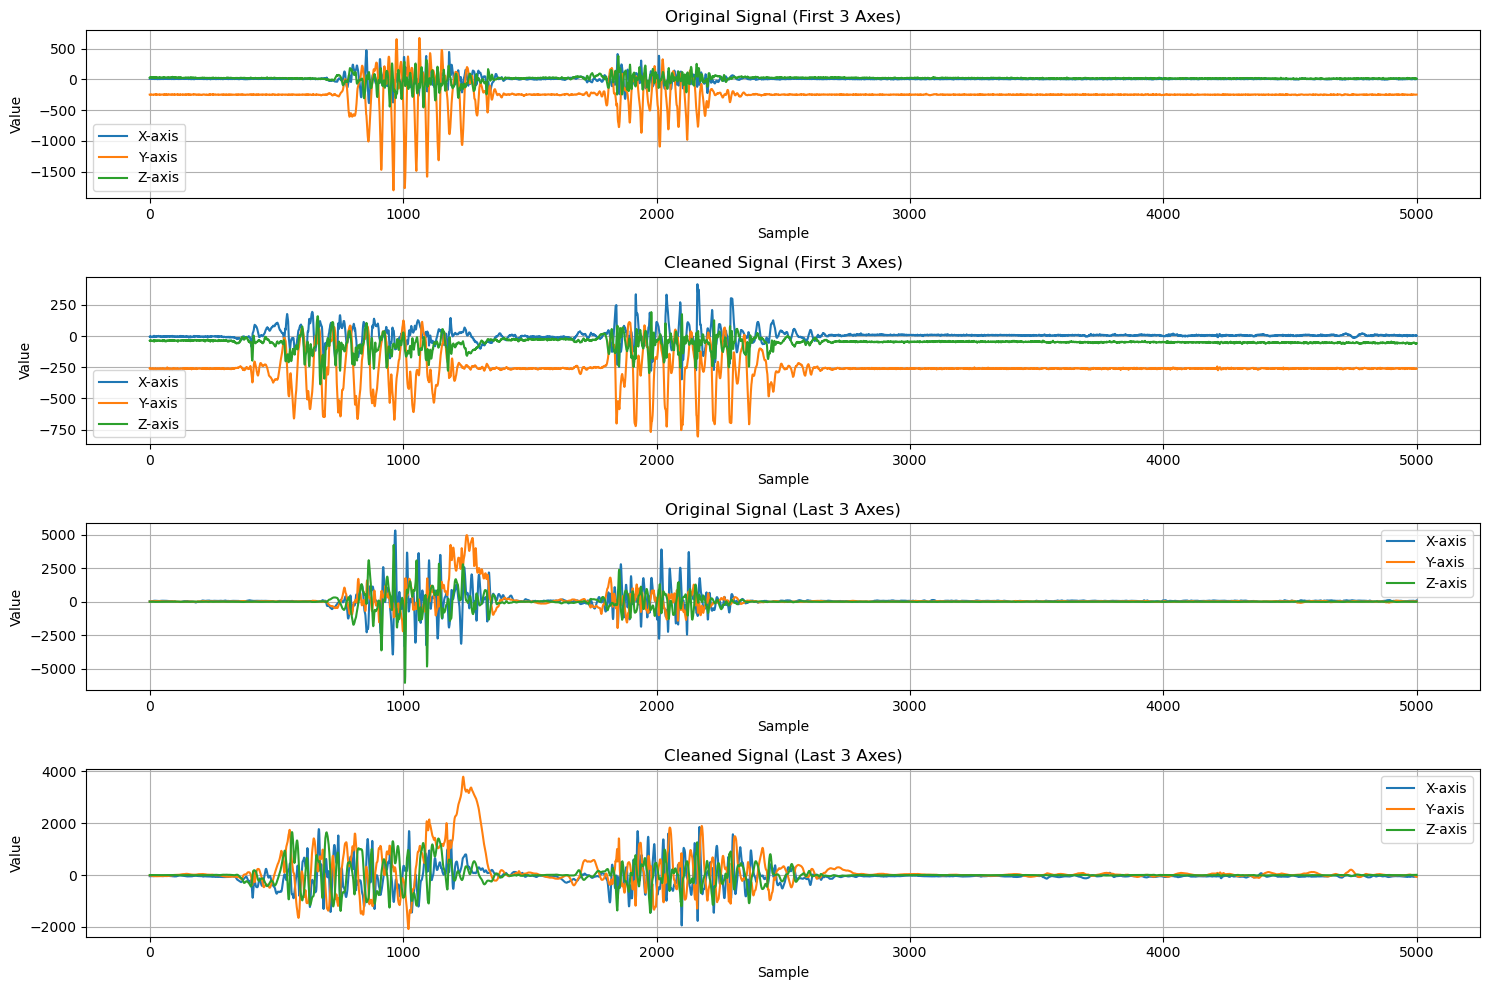

In [26]:
fn.plot_signals(d06_data[22], d06_data[1])

In [13]:
len(d05_data[0][0, :])

1999

In [48]:
variance = np.var(d06_data[0][0, :])
variance

2856.40261756

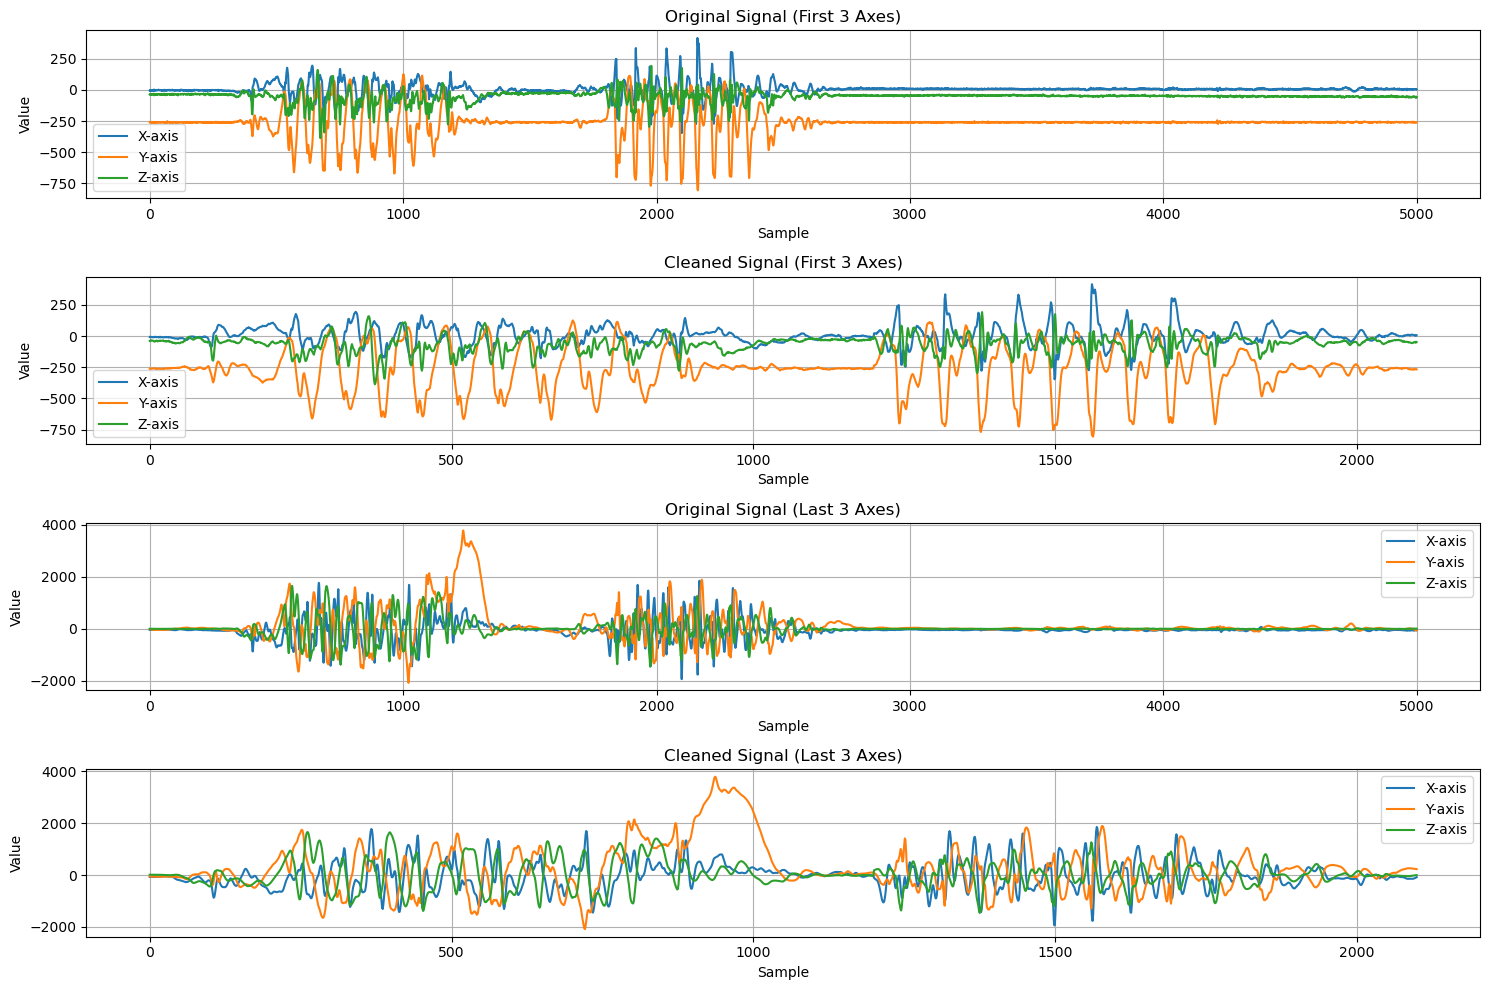

In [78]:
plt.figure(figsize=(15, 10))

# Plot original signal (first 3 axes)
plt.subplot(4, 1, 1)
plt.plot(d06_data[1][0, :], label='X-axis')
plt.plot(d06_data[1][1, :], label='Y-axis')
plt.plot(d06_data[1][2, :], label='Z-axis')
plt.title('Original Signal (First 3 Axes)')
plt.xlabel('Sample')
plt.ylabel('Value')
plt.grid()
plt.legend()

# Plot cleaned signal (first 3 axes)
plt.subplot(4, 1, 2)
plt.plot(new[0, :], label='X-axis')
plt.plot(new[1, :], label='Y-axis')
plt.plot(new[2, :], label='Z-axis')
plt.title('Cleaned Signal (First 3 Axes)')
plt.xlabel('Sample')
plt.ylabel('Value')
plt.grid()
plt.legend()

# Plot original signal (last 3 axes)
plt.subplot(4, 1, 3)
plt.plot(d06_data[1][3, :], label='X-axis')
plt.plot(d06_data[1][4, :], label='Y-axis')
plt.plot(d06_data[1][5, :], label='Z-axis')
plt.title('Original Signal (Last 3 Axes)')
plt.xlabel('Sample')
plt.ylabel('Value')
plt.grid()
plt.legend()

# Plot cleaned signal (last 3 axes)
plt.subplot(4, 1, 4)
plt.plot(new[3, :], label='X-axis')
plt.plot(new[4, :], label='Y-axis')
plt.plot(new[5, :], label='Z-axis')
plt.title('Cleaned Signal (Last 3 Axes)')
plt.xlabel('Sample')
plt.ylabel('Value')
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()

In [30]:
new_d05_data = fn.idle_remover(d05_data, 200, 20)

Signal 1: Original shape = (6, 5000), Cleaned shape = (6, 4200)
Signal 2: Original shape = (6, 5000), Cleaned shape = (6, 4600)
Signal 3: Original shape = (6, 5000), Cleaned shape = (6, 4600)
Signal 4: Original shape = (6, 5000), Cleaned shape = (6, 4600)
Signal 5: Original shape = (6, 5000), Cleaned shape = (6, 5000)
Signal 6: Original shape = (6, 5000), Cleaned shape = (6, 4600)
Signal 7: Original shape = (6, 5000), Cleaned shape = (6, 4400)
Signal 8: Original shape = (6, 5000), Cleaned shape = (6, 5000)
Signal 9: Original shape = (6, 5000), Cleaned shape = (6, 4600)
Signal 10: Original shape = (6, 5000), Cleaned shape = (6, 4600)
Signal 11: Original shape = (6, 5000), Cleaned shape = (6, 4000)
Signal 12: Original shape = (6, 5000), Cleaned shape = (6, 4800)
Signal 13: Original shape = (6, 5000), Cleaned shape = (6, 4400)
Signal 14: Original shape = (6, 5000), Cleaned shape = (6, 4400)
Signal 15: Original shape = (6, 5000), Cleaned shape = (6, 4200)
Signal 16: Original shape = (6, 50

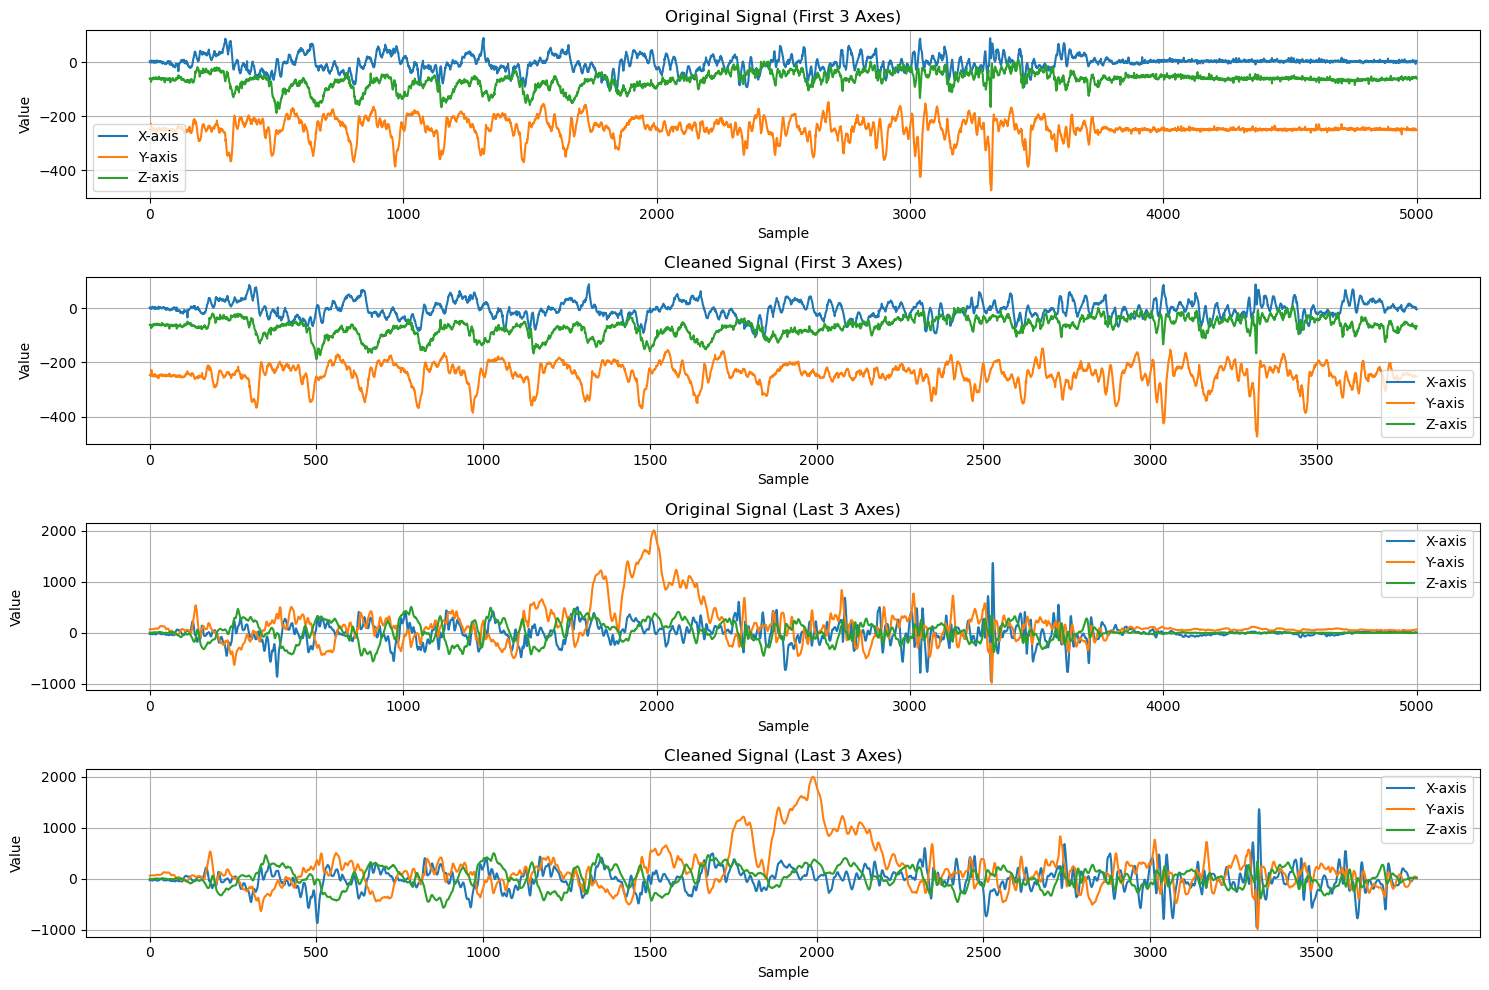

In [31]:
i = 29

fn.plot_signals(d05_data[i], new_d05_data[i])


In [32]:
new_d06_data = fn.idle_remover(d06_data, 300, 20)

Signal 1: Original shape = (6, 5000), Cleaned shape = (6, 1800)
Signal 2: Original shape = (6, 5000), Cleaned shape = (6, 2100)
Signal 3: Original shape = (6, 5000), Cleaned shape = (6, 2100)
Signal 4: Original shape = (6, 5000), Cleaned shape = (6, 2100)
Signal 5: Original shape = (6, 5000), Cleaned shape = (6, 2100)
Signal 6: Original shape = (6, 5000), Cleaned shape = (6, 1800)
Signal 7: Original shape = (6, 5000), Cleaned shape = (6, 1800)
Signal 8: Original shape = (6, 5000), Cleaned shape = (6, 1800)
Signal 9: Original shape = (6, 5000), Cleaned shape = (6, 2100)
Signal 10: Original shape = (6, 5000), Cleaned shape = (6, 2100)
Signal 11: Original shape = (6, 4999), Cleaned shape = (6, 1800)
Signal 12: Original shape = (6, 5000), Cleaned shape = (6, 1800)
Signal 13: Original shape = (6, 5000), Cleaned shape = (6, 2100)
Signal 14: Original shape = (6, 5000), Cleaned shape = (6, 1800)
Signal 15: Original shape = (6, 5000), Cleaned shape = (6, 2100)
Signal 16: Original shape = (6, 49

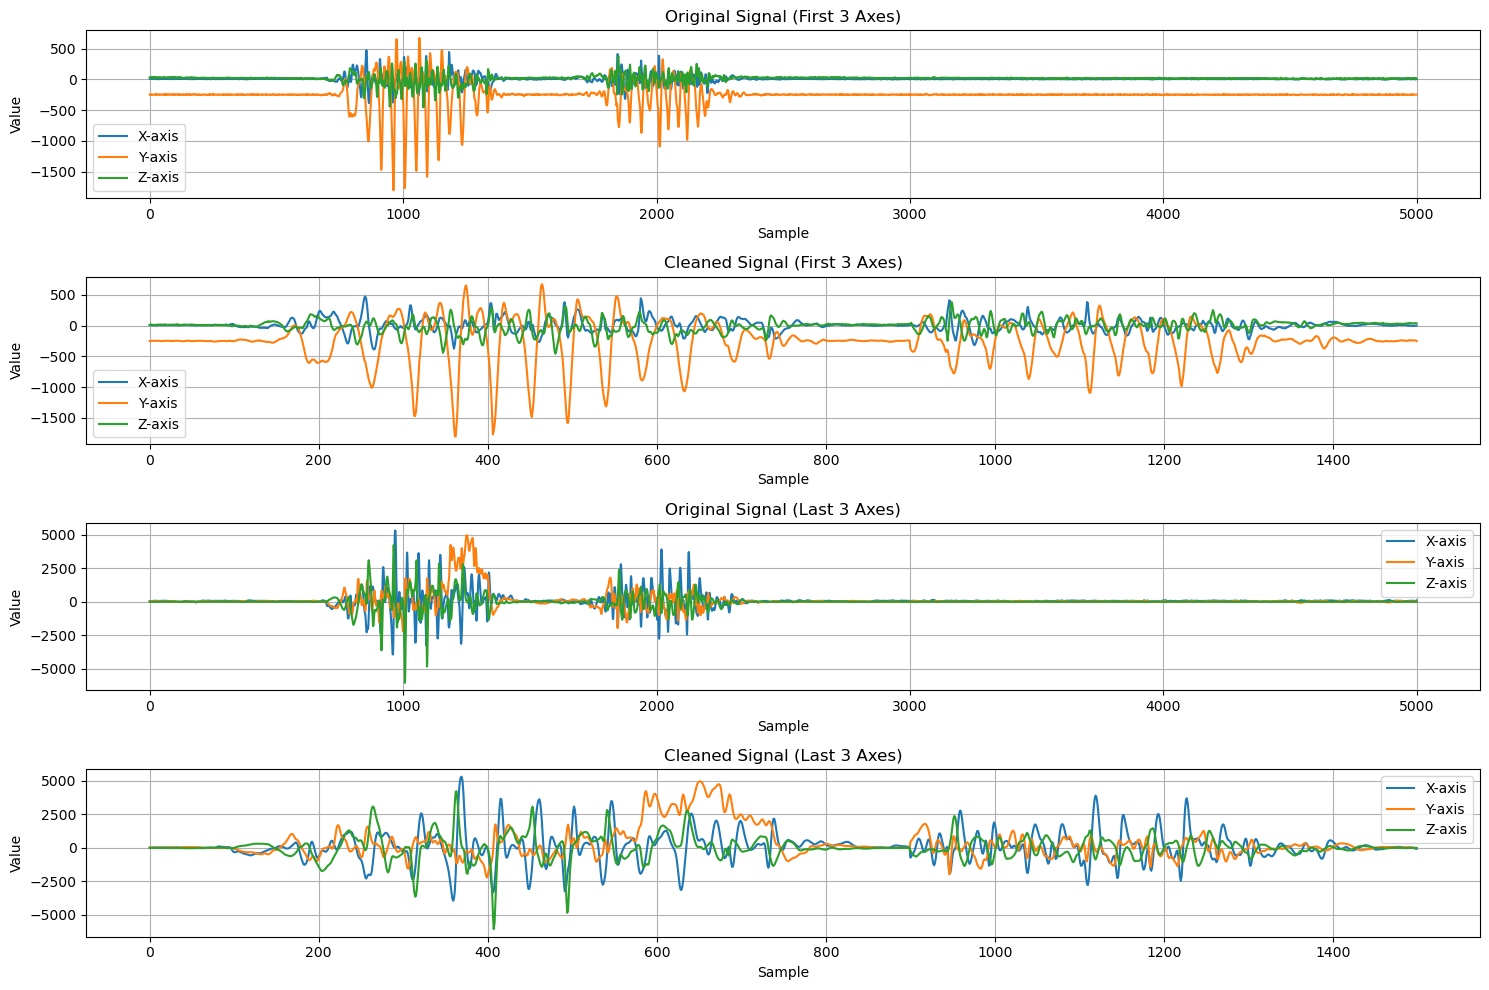

In [33]:
i = 22

fn.plot_signals(d06_data[i], new_d06_data[i])


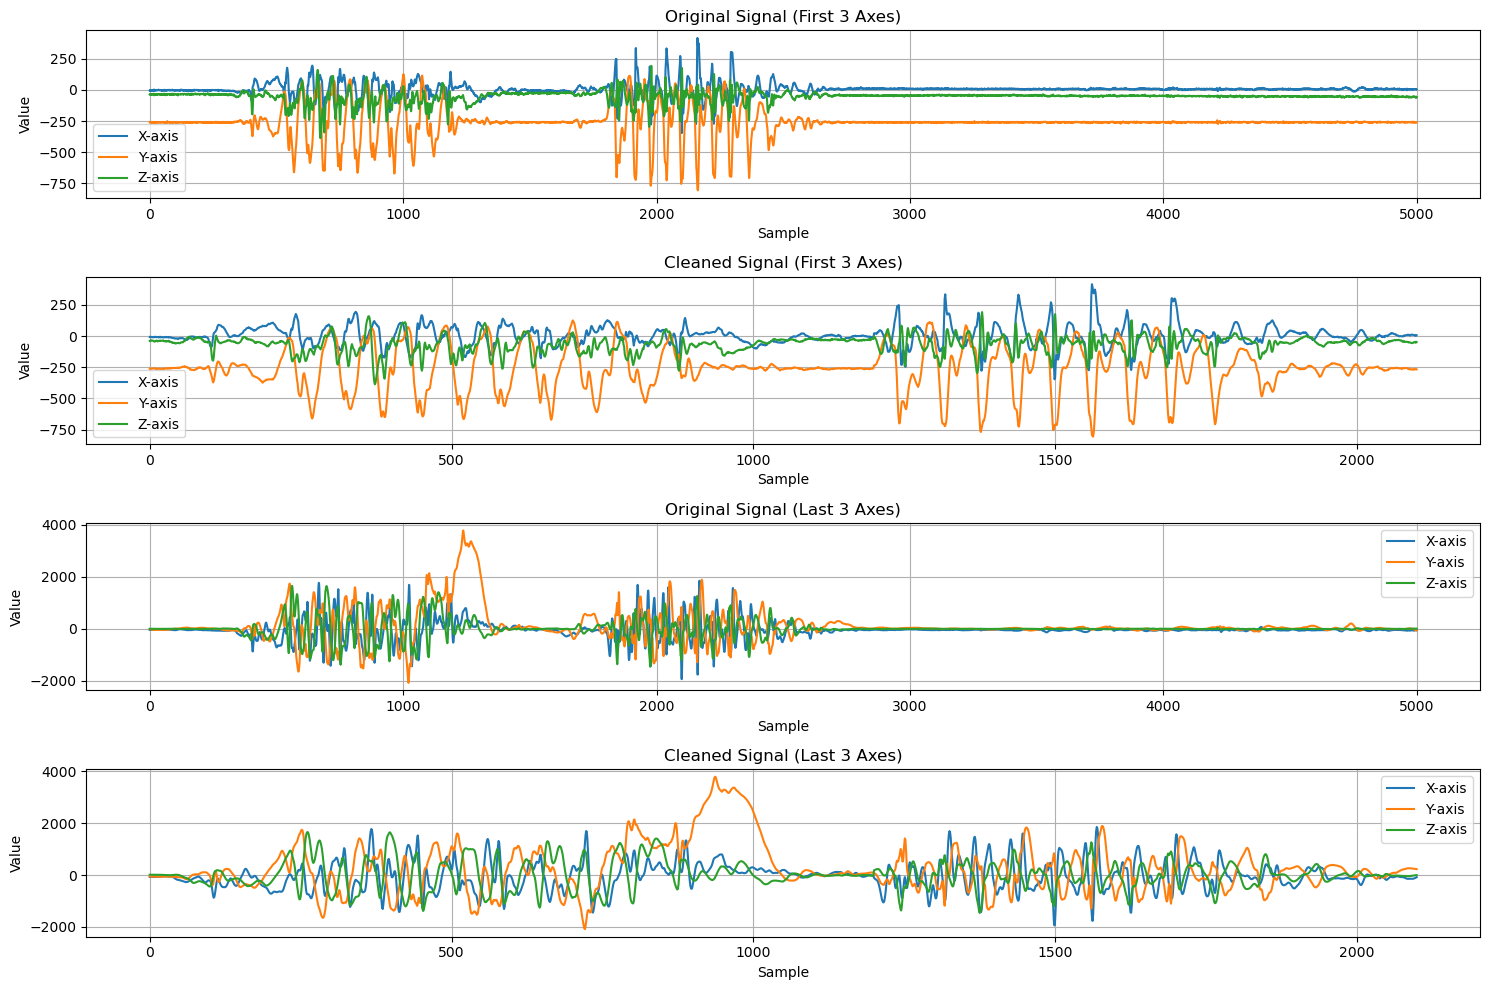

In [34]:
fn.plot_signals(d06_data[1], new_d06_data[1])

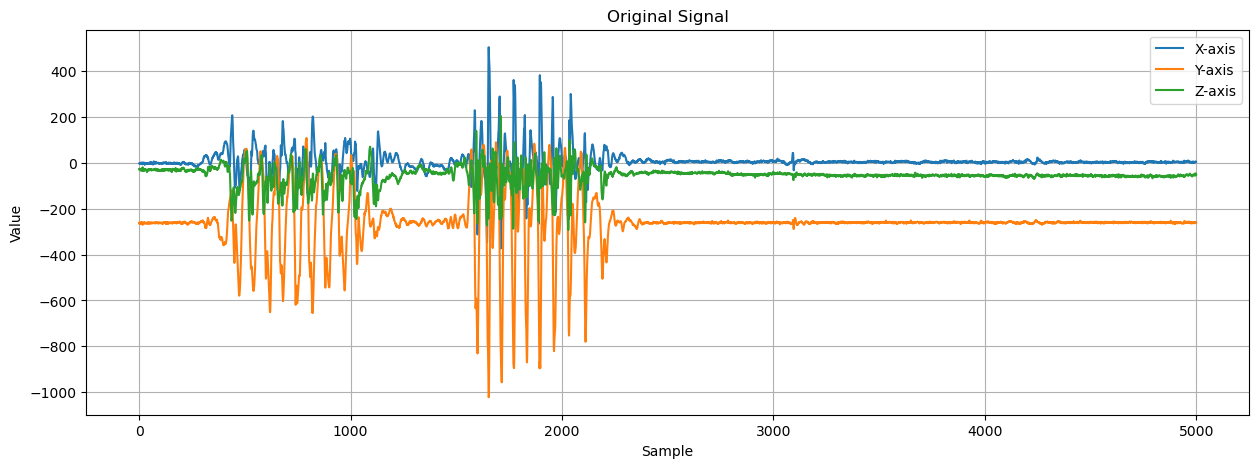

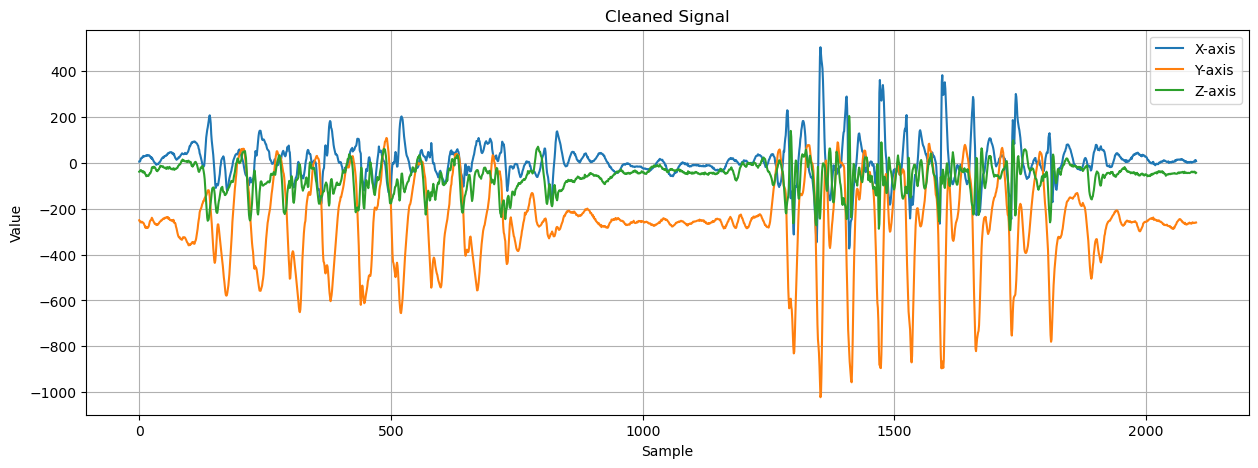

In [63]:
plt.figure(figsize=(15, 5))
plt.plot(test_data[0, :], label='X-axis')
plt.plot(test_data[1, :], label='Y-axis')
plt.plot(test_data[2, :], label='Z-axis')
plt.title('Original Signal')
plt.xlabel('Sample')
plt.ylabel('Value')
plt.grid()
plt.legend()
plt.show()
plt.figure(figsize=(15, 5))
plt.plot(cleaned_signal[0, :], label='X-axis')
plt.plot(cleaned_signal[1, :], label='Y-axis')
plt.plot(cleaned_signal[2, :], label='Z-axis')
plt.title('Cleaned Signal')
plt.xlabel('Sample')
plt.ylabel('Value')
plt.grid()
plt.legend()
plt.show()

In [ ]:
# create a window and look into a signal. remove part that have variance lower than threshold

variance = np.var(d06_data[0][0, :])

threshold = variance / 100
window_size = 500
windowed_data = []

test_data = d06_data[0]
for i in range(len(test_data[0, :]) - window_size):
    window = test_data[:, i:i + window_size]
    # calculate variance
    var = np.var(window)
    if var < threshold:
        # remove the window
        test_data[:, i:i + window_size] = 0




Text(0.5, 1.0, 'plot of activity: Walking upstairs and downstairs quickly (ID: D06)\nfile name: D06_SA01_R01.txt')

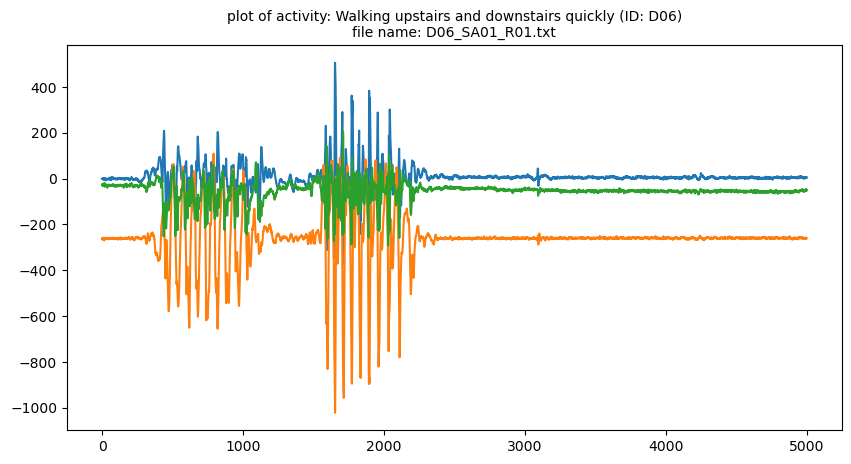

In [42]:
i = 0
# plot from d05 list
plt.figure(figsize=(10, 5))
plt.plot(d06_data[i][0, :], label='X-axis')
plt.plot(d06_data[i][1, :], label='Y-axis')
plt.plot(d06_data[i][2, :], label='Z-axis')
plt.title(
    f"plot of activity: {activity_mapping[d06_file_names[i].split('_')[0]]} "
    f"(ID: {d06_file_names[i].split('_')[0]})"
    f"\nfile name: {d06_file_names[i]}", fontsize=10)

In [ ]:
plt.plot(all_data[450][0, :], label='X-axis')

In [ ]:
# compare plot of fall recording and adl recording

all_axis_fall = np.abs(falls[0][0, :]) + np.abs(falls[0][1, :]) + np.abs(falls[0][2, :])
all_axis_adl = np.abs(adls[0][0, :]) + np.abs(adls[0][1, :]) + np.abs(adls[0][2, :])

plt.figure(figsize=(15, 15))

# Plot the first 3 signals together
plt.subplot(4, 1, 1)
plt.plot(falls[0][0, :], label='X-axis')
plt.plot(falls[0][1, :], label='Y-axis')
plt.plot(falls[0][2, :], label='Z-axis')
plt.plot(all_axis_fall, label='Combined Axis', linestyle='-')
plt.title('ADXL Accelerometer Signals (Fall)')
plt.ylim(-4000, 6000)
plt.xlabel('Sample')
plt.ylabel('Value')
plt.legend()
plt.grid()

plt.subplot(4, 1, 2)
plt.plot(adls[0][0, :], label='X-axis')
plt.plot(adls[0][1, :], label='Y-axis')
plt.plot(adls[0][2, :], label='Z-axis')
plt.plot(all_axis_adl, label='Combined Axis', linestyle='-')
plt.title('ADXL Accelerometer Signals (ADL)')
plt.ylim(-4000, 6000)
plt.xlabel('Sample')
plt.ylabel('Value')
plt.legend()
plt.grid()

# Plot the last 3 signals and adding together
plt.subplot(4, 1, 3)
plt.plot(falls[0][3, :], label='X-axis')
plt.plot(falls[0][4, :], label='Y-axis')
plt.plot(falls[0][5, :], label='Z-axis')
plt.title('Gyroscope Signals (Fall)')
plt.ylim(-30000, 40000)
plt.xlabel('Sample')
plt.ylabel('Value')
plt.legend()
plt.grid()

plt.subplot(4, 1, 4)
plt.plot(adls[0][3, :], label='X-axis')
plt.plot(adls[0][4, :], label='Y-axis')
plt.plot(adls[0][5, :], label='Z-axis')
plt.title('Gyroscope Signals (ADL)')
plt.ylim(-30000, 40000)
plt.xlabel('Sample')
plt.ylabel('Value')
plt.legend()
plt.grid()


plt.suptitle('Sensor Signals for Fall and Non-Fall Activity', fontsize=16)
plt.tight_layout(rect = [0, 0.03, 1, 0.98])  # Adjust the title position
plt.show()


In [ ]:
# calculate fft of signal
def calculate_fft_2(signal, fs):
    N = len(signal)
    T = 1.0 / fs  # Sampling interval (assuming 50 Hz sampling rate)
    yf = np.fft.fft(signal)
    xf = np.fft.fftfreq(N, T)[:N // 2]
    return xf, 2.0 / N * np.abs(yf[0:N // 2])

In [ ]:
i = 7

signal_for_fft = all_data[i][0, :]  # Example signal (X-axis of the first fall)
xf, yf = fn.calculate_fft(signal_for_fft, fs=50)  # Calculate FFT


plt.figure(figsize=(10, 5))
plt.plot(xf, yf)
plt.title(f'Plot of activity: {activity_mapping[activity_code_list[i]]}')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.grid()
plt.show()

In [ ]:
# plot 10 random fft signals
import random

sample_indices = random.sample(range(len(all_data)), 10)  # Randomly select 10 indices
plt.figure(figsize=(15, 20))
for i, index in enumerate(sample_indices):
    signal_for_fft = all_data[index][0, :]  # Example signal (X-axis of the first fall)
    xf, yf = fn.calculate_fft(signal_for_fft, fs=50)  # Calculate FFT
    plt.subplot(5, 2, i + 1)
    plt.plot(xf, yf)
    plt.title(f"ID: {activity_code_list[index]}", fontsize=14)
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Amplitude')
    plt.grid()
plt.tight_layout()
plt.show()

In [ ]:
all_data_filtered = []  # List to store filtered data
for i in range(len(all_data)):
    filtered_data = []
    for j in range(6):  # Assuming 6 signals (3 accelerometer + 3 gyroscope)
        filtered_signal = fn.lowpass_filter(all_data[i][j, :], cutoff=5, fs=200, order=4)
        filtered_data.append(filtered_signal)
    all_data_filtered.append(np.array(filtered_data))

# for i in range(len(all_data)):
#     # Apply lowpass filter to each signal
#     for j in range(6):  # Assuming 6 signals (3 accelerometer + 3 gyroscope)
#         all_data[i][j, :] = lowpass_filter(all_data[i][j, :], cutoff=10, fs=100, order=4)



In [ ]:
filtered_falls = []
filtered_adls = []
for i in range(len(all_labels)):
    if all_labels[i] == 'ADL':
        filtered_adls.append(all_data_filtered[i])
    elif all_labels[i] == 'Fall':
        filtered_falls.append(all_data_filtered[i])
print(f"Number of filtered ADL signals: {len(filtered_adls)}")
print(f"Number of filtered Fall signals: {len(filtered_falls)}")
# Plot the first filtered fall signal vs the original
plt.figure(figsize=(15, 15))
plt.subplot(2, 1, 1)
plt.plot(falls[0][0, :], label='Original Signal')
plt.plot(filtered_falls[0][0, :], label='Filtered Signal', color='red')
plt.title('Filtered Fall Signal')
plt.xlabel('Sample')
plt.ylabel('Value')
plt.legend()
plt.grid()
plt.subplot(2, 1, 2)
plt.plot(adls[0][0, :], label='Original Signal')
plt.plot(filtered_adls[0][0, :], label='Filtered Signal', color='red')
plt.title('Filtered ADL Signal')
plt.xlabel('Sample')
plt.ylabel('Value')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

# feature functions

In [ ]:
data_array = all_data   

f1 = fn.sum_vector_magnitude(data_array, method='all')
f2 = fn.max_peak_to_peak_amp(data_array)
f3 = fn.standard_deviation_magnitude_h(data_array)
f4 = fn.standard_deviation_magnitude(data_array)



In [ ]:
# check type and length of output data

print(type(f1), len(f1), len(f1[4]))  # Use len(f1) since f1 is a list of arrays
print(type(f2), len(f2), len(f2[0]))  # Use np.shape(f2) since f2 is a list of arrays
print(type(f3), len(f3), len(f3[0]))  # Use np.shape(f3) since f3 is a list of arrays
print(type(f4), len(f4), len(f4[0]))  # Use np.shape(f4) since f4 is a list of arrays


In [ ]:
sample_num = 10

plt.figure(figsize=(15, 15))
time = np.arange(0, len(all_data[sample_num][0, :])) / 200  # Assuming a sampling rate of 200 Hz
# Plot the Original Signal
plt.subplot(5, 1, 1)
plt.plot(time, all_data[sample_num][0, :], label='X-axis')
plt.plot(time, all_data[sample_num][1, :], label='Y-axis')
plt.plot(time, all_data[sample_num][2, :], label='Z-axis')
plt.ylim(-1000, 1000)
plt.title(f'Original Axis Signals')
plt.xlabel('Time (s)')
plt.ylabel('Value')
plt.legend()
plt.grid()

# Plot the Sum Vector Magnitude (f1)
plt.subplot(5, 1, 2)
plt.plot(time[:len(f1[sample_num])], f1[sample_num], label='Sum Vector Magnitude (f1)')
plt.ylim(-50, 1500)
plt.title(f'Sum Vector Magnitude Feature (f1)')
plt.xlabel('Time (s)')
plt.ylabel('Value')
plt.legend()
plt.grid()

# Plot the Max Peak-to-Peak Amplitude (f2)
plt.subplot(5, 1, 3)
plt.plot(time[:len(f2[sample_num])], f2[sample_num], label='Max Peak-to-Peak Amplitude (f2)')
plt.ylim(-50, 1100)
plt.title(f'Max Peak-to-Peak Amplitude Feature (f2)')
plt.xlabel('Time (s)')
plt.ylabel('Value')
plt.legend()
plt.grid()

# Plot the Standard Deviation Magnitude on Horizontal Plane (f3)
plt.subplot(5, 1, 4)
plt.plot(time[:len(f3[sample_num])], f3[sample_num], label='Standard Deviation Magnitude (f3)')
plt.ylim(0, 500)
plt.title(f'Standard Deviation Magnitude Feature (f3)')
plt.xlabel('Time (s)')
plt.ylabel('Value')
plt.legend()
plt.grid()

# Plot the Standard Deviation Magnitude (f4)
plt.subplot(5, 1, 5)
plt.plot(time[:len(f4[sample_num])], f4[sample_num], label='Standard Deviation Magnitude (f4)')
plt.ylim(0, 500)
plt.title(f'Standard Deviation Magnitude Feature (f4)')
plt.xlabel('Time (s)')
plt.ylabel('Value')
plt.legend()
plt.grid()

plt.suptitle(
    f"plot of activity: {activity_mapping[activity_code_list[sample_num]]} "
    f"(ID: {activity_code_list[sample_num]})", fontsize=16
)
plt.tight_layout(rect = [0, 0.03, 1, 0.98])
plt.show()



In [ ]:
sample_num = 1000

plt.figure(figsize=(15, 15))
time = np.arange(0, len(all_data[sample_num][0, :])) / 200  # Assuming a sampling rate of 200 Hz
# Plot the Original Signal
plt.subplot(5, 1, 1)
plt.plot(time, all_data[sample_num][0, :], label='X-axis')
plt.plot(time, all_data[sample_num][1, :], label='Y-axis')
plt.plot(time, all_data[sample_num][2, :], label='Z-axis')
plt.ylim(-1000, 1000)
plt.title(f'Original Axis Signals')
plt.xlabel('Time (s)')
plt.ylabel('Value')
plt.legend()
plt.grid()

# Plot the Sum Vector Magnitude (f1)
plt.subplot(5, 1, 2)
plt.plot(time[:len(f1[sample_num])], f1[sample_num], label='Sum Vector Magnitude (f1)')
plt.ylim(-50, 1500)
plt.title(f'Sum Vector Magnitude of XZ Feature (f1)')
plt.xlabel('Time (s)')
plt.ylabel('Value')
plt.legend()
plt.grid()

# Plot the Max Peak-to-Peak Amplitude (f2)
plt.subplot(5, 1, 3)
plt.plot(time[:len(f2[sample_num])], f2[sample_num], label='Max Peak-to-Peak Amplitude (f2)')
plt.ylim(-50, 1100)
plt.title(f'Max Peak-to-Peak Amplitude Feature (f2)')
plt.xlabel('Time (s)')
plt.ylabel('Value')
plt.legend()
plt.grid()

# Plot the Standard Deviation Magnitude on Horizontal Plane (f3)
plt.subplot(5, 1, 4)
plt.plot(time[:len(f3[sample_num])], f3[sample_num], label='Standard Deviation Magnitude (f3)')
plt.ylim(0, 500)
plt.title(f'Standard Deviation Magnitude Feature (f3)')
plt.xlabel('Time (s)')
plt.ylabel('Value')
plt.legend()
plt.grid()

# Plot the Standard Deviation Magnitude (f4)
plt.subplot(5, 1, 5)
plt.plot(time[:len(f4[sample_num])], f4[sample_num], label='Standard Deviation Magnitude (f4)')
plt.ylim(0, 500)
plt.title(f'Standard Deviation Magnitude Feature (f4)')
plt.xlabel('Time (s)')
plt.ylabel('Value')
plt.legend()
plt.grid()

plt.suptitle(
    f"plot of activity: {activity_mapping[activity_code_list[sample_num]]} "
    f"(ID: {activity_code_list[sample_num]})", fontsize=16
)
plt.tight_layout(rect = [0, 0.03, 1, 0.98])
plt.show()

In [ ]:
sample_number = 100  # Index of the sample you want to analyze
signal = all_data[sample_number][0:3,:]  # Example signal
print(signal.shape)

In [ ]:
start, end = fn.find_fall_window(signal)
print(f"Start index of fall window: {start}")
print(f"End index of fall window: {end}")
fn.plot_fall_window(signal, start, end)

In [ ]:
# plot the fall window with the signal
time = np.arange(0, len(signal)) / 200  # Assuming a sampling rate of 200 Hz

plt.figure(figsize=(15, 5))
for i in range(3):
    plt.plot( signal[i,:], label=f'Axis {i+1}')
plt.axvspan(start, end, color='gray', alpha=0.3, label='Fall Window')
plt.title(
    f"ID: {activity_code_list[sample_number]}\n "
    f"{activity_mapping[activity_code_list[sample_number]]}")
plt.xlabel('Time (s)')
plt.ylabel('Value')
plt.legend()
plt.grid()
plt.show()

In [ ]:
# calculate and plot the fall window for n samples
sample_numbers = np.random.randint(1, 4505, size=10)
print(sample_numbers)

In [ ]:

plt.figure(figsize=(20, 20))
for i, sample_number in enumerate(sample_numbers):
    signal = all_data[sample_number][0:3, :]  # Example signal
    start, end = fn.find_fall_window(signal, threshold=650)
    
    plt.subplot(5, 2, i + 1)
    for j in range(3):
        plt.plot(signal[j, :], label=f'Axis {j+1}')
    if start is not None and end is not None:
        plt.axvspan(start, end, color='red', alpha=0.3, label='Fall Window')
    plt.title(
        f"ID: {activity_code_list[sample_number]}\n "
        f"{activity_mapping[activity_code_list[sample_number]]}")
    plt.xlabel('Time (s)')
    plt.ylabel('Value')
    plt.legend()
    plt.grid()
plt.tight_layout()
plt.show()

## find maximum number of each fall

in order to set threshold, we should find minimum "max number" in fall signals. 

In [ ]:
fall_f1 = fn.sum_vector_magnitude_xz(falls, method='all')
fall_f2 = fn.sum_vector_magnitude_xyz(falls, method='all')
adl_f1 = fn.sum_vector_magnitude_xz(adls, method='all')
adl_f2 = fn.sum_vector_magnitude_xyz(adls, method='all')

In [ ]:
list_of_f_maxs = []
list_of_xyz_f_maxs = []
list_of_xz_f_maxs = []
f1_max_list_f = []

for fall in falls:
    list_of_f_maxs.append(np.max(fall[0:3, :], axis=1))
    list_of_xz_f_maxs.append(np.max(np.abs(fall[0, :]) + np.abs(fall[2, :])))
    list_of_xyz_f_maxs.append(np.max(np.abs(fall[0, :]) + np.abs(fall[1, :]) + np.abs(fall[2, :])))
    f1_max_list_f.append(np.max(fall_f1[i]))

list_of_adl_maxs = []
list_of_xyz_adl_maxs = []
list_of_xz_adl_maxs = []
f1_max_list_adl = []
for adl in adls:
    list_of_adl_maxs.append(np.max(adl[0:3, :], axis=1))
    list_of_xz_adl_maxs.append(np.max(np.abs(adl[0, :]) + np.abs(adl[2, :])))
    list_of_xyz_adl_maxs.append(np.max(np.abs(adl[0, :]) + np.abs(adl[1, :]) + np.abs(adl[2, :])))
    f1_max_list_adl.append(np.max(adl_f1[i]))


In [ ]:
#plot the max values of each axis for fall and adl
plt.figure(figsize=(15, 15))
plt.subplot(3, 1, 1)
plt.plot(list_of_f_maxs, '.' ,label='Max Values of Each Axis (Fall)')
plt.plot(list_of_adl_maxs, '.', label='Max Values of Each Axis (ADL)')
plt.title('Max Values of Each Axis')
plt.xlabel('Sample')
plt.ylabel('Value')
plt.legend()
plt.grid()
plt.subplot(3, 1, 2)
plt.plot(list_of_xz_f_maxs, '.', label='Max Values of XZ Axis (Fall)')
plt.plot(list_of_xz_adl_maxs, '.', label='Max Values of XZ Axis (ADL)')
plt.title('Max Values of XZ Axis')
plt.xlabel('Sample')
plt.ylabel('Value')
plt.legend()
plt.grid()
plt.subplot(3, 1, 3)
plt.plot(list_of_xyz_f_maxs, '.', label='Max Values of XYZ Axis (Fall)')
plt.plot(list_of_xyz_adl_maxs, '.', label='Max Values of XYZ Axis (ADL)')
plt.title('Max Values of XYZ Axis')
plt.xlabel('Sample')
plt.ylabel('Value')
plt.legend()
plt.grid()
plt.suptitle('Max Values of Each Axis for Fall and ADL', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust the title position
plt.show()


In [ ]:
np.shape(list_of_f_maxs), len(list_of_f_maxs), len(list_of_xz_f_maxs), len(list_of_xyz_f_maxs),

In [ ]:
min_value_f1 = np.min(list_of_f_maxs)
min_value_f1
# print index of min value
min_index_f1 = np.where(list_of_f_maxs == min_value_f1)[0][0]

In [ ]:
min_index_f1

In [ ]:
# print minimum number in f1_max_list
min_value_f_max = np.min(list_of_f_maxs)
min_index_f_index = np.where(list_of_f_maxs == min_value_f_max)[0][0]
print(f"Minimum value in list_of_f_maxs: {min_value_f_max} at index {min_index_f_index}")


min_value_xz = np.min(list_of_xz_f_maxs)
min_index_xz_index = list_of_xz_f_maxs.index(min_value_xz)
print(f"Minimum value in list_of_xz_maxs: {min_value_xz} at index {min_index_xz_index}")

min_value_xyz = np.min(list_of_xyz_f_maxs)
min_index_xyz_index = list_of_xyz_f_maxs.index(min_value_xyz)
print(f"Minimum value in list_of_xyz_maxs: {min_value_xyz} at index {min_index_xyz_index}")

print('------------------------------------------')

# print maximum values in adl
max_value_adl_max = np.max(list_of_adl_maxs)
max_index_adl_index = np.where(list_of_adl_maxs == max_value_adl_max)[0][0]
print(f"Maximum value in adl_max_list: {max_value_adl_max} at index {max_index_adl_index}")

max_value_xz_adl = np.max(list_of_xz_adl_maxs)
max_index_xz_adl_index = np.where(list_of_xz_adl_maxs == max_value_xz_adl)[0][0]
print(f"Maximum value in list_of_xz_maxs: {max_value_xz_adl} at index {max_index_xz_adl_index}")

max_value_xyz_adl = np.max(list_of_xyz_adl_maxs)
max_index_xyz_adl_index = np.where(list_of_xyz_adl_maxs == max_value_xyz_adl)[0][0]
print(f"Maximum value in list_of_xyz_maxs: {max_value_xyz_adl} at index {max_index_xyz_adl_index}")



In [ ]:
# plot fall and adl with min values
sample_number = min_index_f_index
signal = falls[sample_number][0:3, :]  # Example signal
plt.figure(figsize=(15, 10))

# Plot the original signal
plt.subplot(2, 1, 1)
for i in range(3):
    plt.plot(signal[i, :], label=f'Axis {i+1}')
plt.title(f"Fall activity with minimum values - Original Signal")
plt.xlabel('Time (s)')
plt.ylabel('Value')
plt.legend()
plt.grid()

# Plot the combined and feature signals
plt.subplot(2, 1, 2)
plt.plot(np.abs(signal[0, :]) + np.abs(signal[1, :]) + np.abs(signal[2, :]), label='Combined Axis', linestyle='--')
plt.plot(fall_f1[sample_number], label='Sum Vector Magnitude xz', linestyle='--')
plt.plot(fall_f2[sample_number], label='Sum Vector Magnitude xyz', linestyle='--')
plt.title(f"Fall activity with minimum values - Feature Signals")
plt.xlabel('Time (s)')
plt.ylabel('Value')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

sample_number = max_index_adl_index
signal = adls[sample_number][0:3, :]  # Example signal
plt.figure(figsize=(15, 5))
for i in range(3):
    plt.plot(signal[i, :], label=f'Axis {i+1}')
plt.title(f"ADL activity with maximum values")
plt.xlabel('Time (s)')
plt.ylabel('Value')
plt.legend()
plt.grid()
plt.show()

In [ ]:
#plot fall[33]

kk = min_index_xz_index

plt.figure(figsize=(15, 10))

# Plot the original signal
plt.subplot(2, 1, 1)
plt.plot(falls[kk][0, :], label='X-axis')
plt.plot(falls[kk][1, :], label='Y-axis')
plt.plot(falls[kk][2, :], label='Z-axis')
plt.title(f'Fall Signal (Fall {kk})')
plt.xlabel('Sample')
plt.ylabel('Value')
plt.legend()
plt.grid()

# Plot the sum vector magnitude (f1)
plt.subplot(2, 1, 2)
plt.plot(np.sqrt(falls[kk][0, :]**2 + falls[kk][1, :]**2 + falls[kk][2, :]**2), label='Sum Vector Magnitude')
plt.plot(fall_f1[kk], label='Sum Vector Magnitude (f1)')
plt.title(f'Sum Vector Magnitude Feature (f1) for Fall {kk}')

plt.xlabel('Sample')
plt.ylabel('Value')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

### make all data same shape by trimming longer signals to size of minimum signal

In [ ]:
min_length = min(matrix.shape[1] for matrix in all_data)
print(f"Minimum length of all data matrices: {min_length}")

In [ ]:
trimmed_data = fn.data_equal_trim(all_data) 

In [ ]:
shapes = [data.shape for data in trimmed_data]
print(f"Number of samples: {len(trimmed_data)}")
print(f"Shape of each sample: {shapes[:5]} ...")  # Display the shape of the first 5 samples

In [ ]:
trimmed_data = np.array(trimmed_data)
print(f"Shape of the new data: {trimmed_data.shape}")  # Shape should be (number_of_samples, 6, min_length)

In [ ]:
plt.figure(figsize=(15, 5))
plt.subplot(2, 1, 1)
for i in range(3):
    plt.plot(trimmed_data[sample_numbers[8]][i, :], label=f'Axis {i+1}')
plt.title(
    f"ID: {activity_code_list[sample_numbers[8]]} - "
    f"{activity_mapping[activity_code_list[sample_numbers[8]]]}")
plt.xlabel('Sample')
plt.ylabel('Value')
plt.grid()


plt.subplot(2, 1, 2)
for i in range(3):
    plt.plot(all_data[sample_numbers[8]][i, :], label=f'Axis {i+1}')
plt.title(
    f"ID: {activity_code_list[sample_numbers[8]]} - "
    f"{activity_mapping[activity_code_list[sample_numbers[8]]]}")
plt.xlabel('Sample')
plt.ylabel('Value')
plt.legend()
plt.tight_layout()
plt.grid()
plt.show()

In [ ]:


f1_trimmed_data = fn.sum_vector_magnitude(trimmed_data, method='all')
f2_trimmed_data = fn.max_peak_to_peak_amp(trimmed_data)
f3_trimmed_data = fn.standard_deviation_magnitude_h(trimmed_data)
f4_trimmed_data = fn.standard_deviation_magnitude(trimmed_data)

In [ ]:
sample_num = 10

plt.figure(figsize=(15, 15))
time = np.arange(0, len(trimmed_data[sample_num][0, :])) / 200  # Assuming a sampling rate of 200 Hz
# Plot the Original Signal
plt.subplot(5, 1, 1)
plt.plot(time, trimmed_data[sample_num][0, :], label='X-axis')
plt.plot(time, trimmed_data[sample_num][1, :], label='Y-axis')
plt.plot(time, trimmed_data[sample_num][2, :], label='Z-axis')
plt.ylim(-1000, 1000)
plt.title(
    f"ID: {activity_code_list[sample_num]} - "
    f"{activity_mapping[activity_code_list[sample_num]]}")
plt.xlabel('Time (s)')
plt.ylabel('Value')
plt.legend()
plt.grid()

# Plot the Sum Vector Magnitude (f1)
plt.subplot(5, 1, 2)
plt.plot(time[:len(f1_trimmed_data[sample_num])], f1_trimmed_data[sample_num], label='Sum Vector Magnitude (f1)')
plt.ylim(-50, 1500)
plt.title(
    f'Sum Vector Magnitude Feature (f1) for {activity_code_list[sample_num]} - '
    f'{activity_mapping[activity_code_list[sample_num]]}')
plt.xlabel('Time (s)')
plt.ylabel('Value')
plt.legend()
plt.grid()

# Plot the Max Peak-to-Peak Amplitude (f2)
plt.subplot(5, 1, 3)
plt.plot(time[:len(f2_trimmed_data[sample_num])], f2_trimmed_data[sample_num], label='Max Peak-to-Peak Amplitude (f2) - '
    f'{activity_mapping[activity_code_list[sample_num]]}')
plt.ylim(-50, 1100)
plt.title(f'Max Peak-to-Peak Amplitude Feature (f2) for {activity_code_list[sample_num]} - {activity_mapping[activity_code_list[sample_num]]}')
plt.xlabel('Time (s)')
plt.ylabel('Value')
plt.legend()
plt.grid()

# Plot the Standard Deviation Magnitude on Horizontal Plane (f3)
plt.subplot(5, 1, 4)
plt.plot(time[:len(f3_trimmed_data[sample_num])], f3_trimmed_data[sample_num], label='Standard Deviation Magnitude (f3) - '
    f'{activity_mapping[activity_code_list[sample_num]]}')
plt.ylim(0, 500)
plt.title(f'Standard Deviation Magnitude Feature (f3) for {activity_code_list[sample_num]} - {activity_mapping[activity_code_list[sample_num]]}')
plt.xlabel('Time (s)')
plt.ylabel('Value')
plt.legend()
plt.grid()

# Plot the Standard Deviation Magnitude (f4)
plt.subplot(5, 1, 5)
plt.plot(time[:len(f4_trimmed_data[sample_num])], f4_trimmed_data[sample_num], label='Standard Deviation Magnitude (f4) - '
    f'{activity_mapping[activity_code_list[sample_num]]}')
plt.ylim(0, 500)
plt.title(f'Standard Deviation Magnitude Feature (f4) for {activity_code_list[sample_num]} - {activity_mapping[activity_code_list[sample_num]]}')
plt.xlabel('Time (s)')
plt.ylabel('Value')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

In [ ]:
# plot random 20 samples
sample_numbers = np.random.randint(1, 4505, size=20)

In [ ]:

plt.figure(figsize=(15, 30))
for i, sample_number in enumerate(sample_numbers):
    signal = trimmed_data[sample_number][0:3,:]  # Example signal
    start, end = fn.find_fall_window(signal, threshold=700)
    
    # plt.subplot(20, 1, i+1)
    # for j in range(3):
    #     plt.plot(signal[j,:], label=f'Axis {j+1}')
    # plt.axvspan(start, end, color='red', alpha=0.5, label='Fall Window')
    # plt.ylim(-1100, 1100)
    # plt.title(f'Original Axis Signals for {activity_code_list[sample_number]}')
    # plt.xlabel('Time (s)')
    # plt.ylabel('Value')
    # plt.legend()
    # plt.tight_layout()
    # plt.grid()


    plt.subplot(10, 2, i + 1)
    for j in range(3):
        plt.plot(signal[j, :], label=f'Axis {j+1}')
    if start is not None and end is not None:
        plt.axvspan(start, end, color='red', alpha=0.3, label='Fall Window')
    plt.title(
        f"ID: {activity_code_list[sample_number]}\n "
        f"{activity_mapping[activity_code_list[sample_number]]}")
    plt.xlabel('Time (s)')
    plt.ylabel('Value')
    plt.legend()
    plt.grid()
plt.tight_layout()
plt.show()

In [ ]:
print(len(trimmed_data[53][0]))
print(len(all_data[53][4,:]))


In [ ]:
# create a set for all unique activity codes
activity_types = set(activity_code_list)

# print(activity_types)
# sort the activity types
sorted_activity_types = sorted(activity_types)

print(sorted_activity_types)

# for activity in sorted_activity_types:
#     print(activity)


In [ ]:
# create a dictionary for all unique activity codes
activity_dict = {activity: i for i, activity in enumerate(sorted_activity_types)}
for activity, code in activity_dict.items():
    print(f"{activity}: {code}")


In [ ]:
# create label list of activity types
activity_codes = [activity_dict[activity] for activity in activity_code_list if activity in activity_dict]


In [ ]:
# create activity code list of fall and adl
boolean_list = []
for i in range(len(activity_code_list)):
    if activity_code_list[i].startswith('D'):
        boolean_list.append(1)
    elif activity_code_list[i].startswith('F'):
        boolean_list.append(0)
    else:
        print(f"Unknown activity code: {activity_code_list[i]}")

In [ ]:
boolean_list = np.array(boolean_list)
print(boolean_list.shape)
print(boolean_list)

In [ ]:
# for activity, code in zip(activity_code_list, activity_codes):
#     print(f"{activity} --> {code}")


In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical

In [ ]:
# Split into Train/Test Sets for Convolutional Neural Network model

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(trimmed_data, boolean_list, test_size=0.4, random_state=42)
# Split the testing set into validation and testing sets
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=0.5, random_state=42)
print(f"Training data shape: {x_train.shape}")
print(f"Testing data shape: {x_test.shape}")
print(f"Validation data shape: {x_val.shape}")

# Define the number of classes
num_classes = 2  # Binary classification: Fall (0) and ADL (1)

# Reshape data for CNN input shape
x_train = x_train.reshape(-1, 6, min_length, 1)
x_val = x_val.reshape(-1, 6, min_length, 1)
x_test = x_test.reshape(-1, 6, min_length, 1)

# Convert labels to one-hot encoding
from keras.utils import to_categorical
y_train = to_categorical(y_train, num_classes=num_classes)
y_val = to_categorical(y_val, num_classes=num_classes)
y_test = to_categorical(y_test, num_classes=num_classes)

# Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(6, min_length, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')  # For categorical classification
])

model.summary()

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_val, y_val), verbose=1)


In [ ]:
# evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

In [ ]:
from sklearn.metrics import jaccard_score

y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert predictions to class indices
y_true_classes = np.argmax(y_test, axis=1)  # Convert true labels to class indices

# Calculate Jaccard score for binary classification
jaccard = jaccard_score(y_true_classes, y_pred_classes, pos_label=0)
print(f"Jaccard Score: {jaccard}")

jaccard = jaccard_score(y_true_classes, y_pred_classes, pos_label=1)
print(f"Jaccard Score: {jaccard}")

In [ ]:
cnf = fn.confusion_matrix(y_true_classes, y_pred_classes)
plt.figure(figsize=(10, 10))
fn.plot_confusion_matrix(cnf, classes=['Fall', 'ADL'], normalize=False, title='Confusion Matrix')


# tsfresh:

In [ ]:
# df_time = np.arange(0, len(trimmed_data[0][0, :])) / 200  # Assuming a sampling rate of 200 Hz


In [ ]:
# type(df_time)

In [ ]:
# df_time

In [ ]:
# create a dataframe for the time and 3-axis accelerometer data and 3-axis gyroscope data

# df = pd.DataFrame({
#     'ID': '1',
#     'Tag': f'{activity_code_list[0]}',
#     'Time': df_time,
#     'Acc X': trimmed_data[0][0, :],
#     'Acc Y': trimmed_data[0][1, :],
#     'Acc Z': trimmed_data[0][2, :],
#     'Gyro X': trimmed_data[0][3, :],
#     'Gyro Y': trimmed_data[0][4, :],
#     'Gyro Z': trimmed_data[0][5, :]
# })


In [ ]:
# df

In [ ]:
# id_list = np.arange(1, len(trimmed_data) + 1)
# id_list

In [ ]:
df_all = fn.ts_fresh_format(trimmed_data, activity_code_list)
df_all

In [ ]:
df_all.head()

In [ ]:
from tsfresh.feature_extraction import MinimalFCParameters
from tsfresh import extract_features

In [ ]:
df_tsfresh = pd.melt(
    df_all,
    id_vars=['ID', 'Time', 'Tag'],
    value_vars=['Acc X', 'Acc Y', 'Acc Z', 'Gyro X', 'Gyro Y', 'Gyro Z'],
    var_name='feature',
    value_name='value'
)


In [ ]:

# minimal_features = MinimalFCParameters()

# extracted_features_minimal = extract_features(
#     df_tsfresh,
#     column_id='ID',
#     column_sort='Time',
#     column_kind='feature',
#     column_value='value',
#     default_fc_parameters=minimal_features,
#     n_jobs=1  # Set to -1 for all CPUs or a specific number
# )

In [ ]:
# save extracted_features_minimal
# extracted_features_minimal.to_csv('extracted_features_minimal.csv', index=True)
extracted_features_minimal = pd.read_csv('extracted_features_minimal.csv')
extracted_features_minimal

In [ ]:
run = False     # Set to True to run the feature extraction
if run:
    # Extract features using tsfresh
    extracted_features = extract_features(
        df_tsfresh,
        column_id='ID',
        column_sort='Time',
        column_kind='feature',
        column_value='value',
        n_jobs=1
    )


In [ ]:
# save the extracted features to a csv file
# extracted_features.to_csv('extracted_features.csv', index=True)
extracted_features = pd.read_csv('extracted_features.csv')

In [ ]:
loaded_features = extracted_features

In [ ]:
extracted_features.describe()

In [ ]:
# count number of features in extracted_features
num_features = len(extracted_features.columns)
print(f"Number of features extracted: {num_features}")

In [ ]:
# loaded_features = pd.read_csv('extracted_features.csv')
loaded_features

In [ ]:
from tsfresh import select_features
from tsfresh.utilities.dataframe_functions import impute

In [ ]:
y = df_all[['ID', 'Tag']].drop_duplicates().set_index('ID')['Tag']

# Get all IDs from original data (assuming 4505 samples)
correct_ids = df_all['ID'].unique()  # Should return array of 4505 IDs

# Assign the correct index
loaded_features.index = correct_ids

filtered_features = select_features(loaded_features, y)

In [ ]:
filtered_features.to_csv('filtered_features.csv', index=True)
filtered_features

---

In [ ]:
# import yaml
# import zipfile

# # Read YAML file
# with open('config.yaml', 'r') as f:
#     config = yaml.safe_load(f)

# # Get the file path from YAML
# file_path = config['file_path']

# # Open the ZIP file
# with zipfile.ZipFile(file_path, 'r') as zip_ref:
#     zip_ref.extractall('unzipped_dataset')  # Extract to this folder
#     print("Files extracted to 'unzipped_dataset'")

